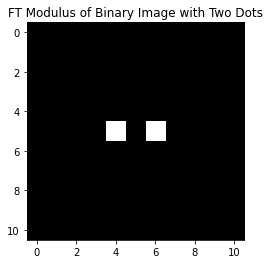

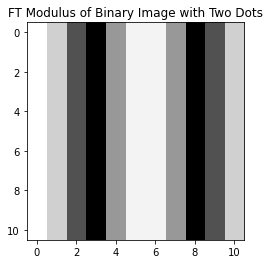

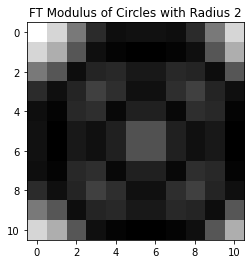

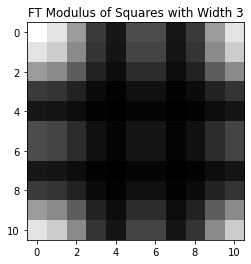

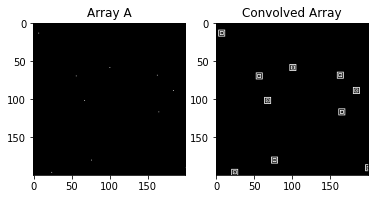

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Task 1: Create a binary image of two dots and display the FT modulus

# Create binary image with two dots
image = np.zeros((11, 11))
image[5, 4] = 1
image[5, 6] = 1
plt.imshow(image, cmap='gray')
plt.title('FT Modulus of Binary Image with Two Dots')
plt.show()

# Compute Fourier transform and display modulus
ft = np.fft.fft2(image)
ft_modulus = np.abs(ft)
plt.imshow(ft_modulus, cmap='gray')
plt.title('FT Modulus of Binary Image with Two Dots')
plt.show()


# Task 2: Replace dots with circles of some radius

# Create circles with radius 2
circles = np.zeros((11, 11))
for i in range(11):
    for j in range(11):
        if np.sqrt((i-5)**2 + (j-5)**2) <= 2:
            circles[i, j] = 1

# Compute Fourier transform and display modulus
ft = np.fft.fft2(circles)
ft_modulus = np.abs(ft)
plt.imshow(ft_modulus, cmap='gray')
plt.title('FT Modulus of Circles with Radius 2')
plt.show()


# Task 3: Replace dots with squares of some width

# Create squares with width 3
squares = np.zeros((11, 11))
squares[4:7, 4:7] = 1

# Compute Fourier transform and display modulus
ft = np.fft.fft2(squares)
ft_modulus = np.abs(ft)
plt.imshow(ft_modulus, cmap='gray')
plt.title('FT Modulus of Squares with Width 3')
plt.show()


# Task 4: Create array with random 1's and convolve with arbitrary pattern

# Create array with 10 random 1's
A = np.zeros((200, 200))
for i in range(10):
    row = np.random.randint(0, 200)
    col = np.random.randint(0, 200)
    A[row, col] = 1

# Create arbitrary pattern
d = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 0, 0, 0, 0, 0, 0, 0, 1],
              [1, 0, 1, 1, 1, 1, 1, 0, 1],
              [1, 0, 1, 0, 0, 0, 1, 0, 1],
              [1, 0, 1, 0, 1, 0, 1, 0, 1],
              [1, 0, 1, 0, 0, 0, 1, 0, 1],
              [1, 0, 1, 1, 1, 1, 1, 0, 1],
              [1, 0, 0, 0, 0, 0, 0, 0, 1],
              [1, 1, 1, 1, 1, 1, 1, 1, 1]])

# Convolve A and d
convolved = signal.convolve2d(A, d, mode='same')

# Display results
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(A, cmap='gray')
ax[0].set_title('Array A')
ax[1].imshow(convolved, cmap='gray')
ax[1].set_title('Convolved Array')
plt.show()

In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def fourier_transform(image_path, inner_radius, outer_radius):
    dummy_outer_radius = 500 - outer_radius
    
    # Load image
    img = cv2.imread(image_path, 0)

    # Perform Fourier transform
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    phase_spectrum = np.angle(fshift)

    # Create mask for circle clipping
    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2
    Y, X = np.ogrid[:rows, :cols]
    mask = np.zeros((rows, cols))
    mask_outer = (X - ccol)**2 + (Y - crow)**2 <= outer_radius**2
    mask_inner = (X - ccol)**2 + (Y - crow)**2 <= inner_radius**2
    mask[mask_outer] = 1
    mask[mask_inner] = 0

    # Apply mask to Fourier transform
    fshift_clipped = fshift * mask
    magnitude_spectrum_clipped = 20*np.log(np.abs(fshift_clipped))
    magnitude_spectrum_clipped = np.where(mask != 1, 0, magnitude_spectrum_clipped) # Set clipped area to black
    phase_spectrum_clipped = np.angle(fshift_clipped)

    # Perform inverse Fourier transform on clipped Fourier transform
    f_ishift_clipped = np.fft.ifftshift(fshift_clipped)
    img_clipped = np.fft.ifft2(f_ishift_clipped).real

    
    #Save images
    plt.imsave('input_image.jpg', img, cmap='gray')
    plt.imsave(f'magnitude_spectrum_{inner_radius}_{outer_radius}.jpg', magnitude_spectrum, cmap='gray')
    plt.imsave(f'phase_spectrum_{inner_radius}_{outer_radius}.jpg', phase_spectrum, cmap='gray')
    
    return img_clipped


fourier_transform("whorl.png", 10,150)


C:\Users\Lyle\AppData\Local\Temp\ipykernel_14756\1983757473.py:30: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum_clipped = 20*np.log(np.abs(fshift_clipped))


array([[ 22.62989038,  29.27118424,  25.86980333, ...,  21.61305965,
         22.95631118,  18.98056251],
       [ 30.25250407,  39.92484079,  40.4046215 , ...,  25.88651359,
         32.20723152,  28.93953427],
       [ 13.9594676 ,  22.79920812,  20.50862968, ...,   9.6785313 ,
         15.40872279,  12.09046217],
       ...,
       [  3.71751418,  14.18705833,  11.17425792, ..., -14.97375352,
        -27.92288142, -25.32417945],
       [-16.66423414,  -7.41771608, -13.19991255, ..., -31.51612812,
        -43.07137979, -41.10832623],
       [-13.3470912 ,  -7.58237524, -15.26365779, ..., -18.49249628,
        -24.58027471, -26.25638937]])

In [ ]:
import numpy as np
import cv2

# Load the image as grayscale
img = cv2.imread('arch.png', cv2.IMREAD_GRAYSCALE)

# Subtract the mean grayscale value
mean_val = np.mean(img)
img = img - mean_val

# Fourier transform the image
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift))

# Identify the peak
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2
mask = np.zeros((rows, cols), np.uint8)
mask[crow - 30:crow + 30, ccol - 30:ccol + 30] = 1
fshift_filtered = fshift * mask

# Inverse Fourier transform and recover the original image
f_ishift = np.fft.ifftshift(fshift_filtered)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

# Convert the image back to uint8 format
img_back = np.uint8(img_back)

# Display the original and filtered images
# cv2.imshow('Original Image', img)
# cv2.imshow('Filtered Image', img_back)
cv2.imwrite('filtered_image.jpg', img_back)
#cv2.waitKey(0)
# cv2.destroyAllWindows()
